In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

### simplified df only with the columns of interest

In [2]:
df = pd.read_pickle("./data/staySpain_transformed.pkl")

In [3]:
df = df[['apartment_id', 'room_type', 'price', 'pricexperson', 'amenities_score', 'accommodates', 'review_scores_location', 'city']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7693 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   apartment_id            7693 non-null   int64  
 1   room_type               7693 non-null   object 
 2   price                   7693 non-null   float64
 3   pricexperson            7693 non-null   float64
 4   amenities_score         7693 non-null   float64
 5   accommodates            7693 non-null   int64  
 6   review_scores_location  6037 non-null   float64
 7   city                    7693 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 540.9+ KB


### 21% of analysed accomodations don't have a value for location review

In [5]:
review_scores_location_null_pct = ((7693-6037)/7693)*100
print(review_scores_location_null_pct)

21.52606265436111


### Distribution of null values on the column review_scores_location

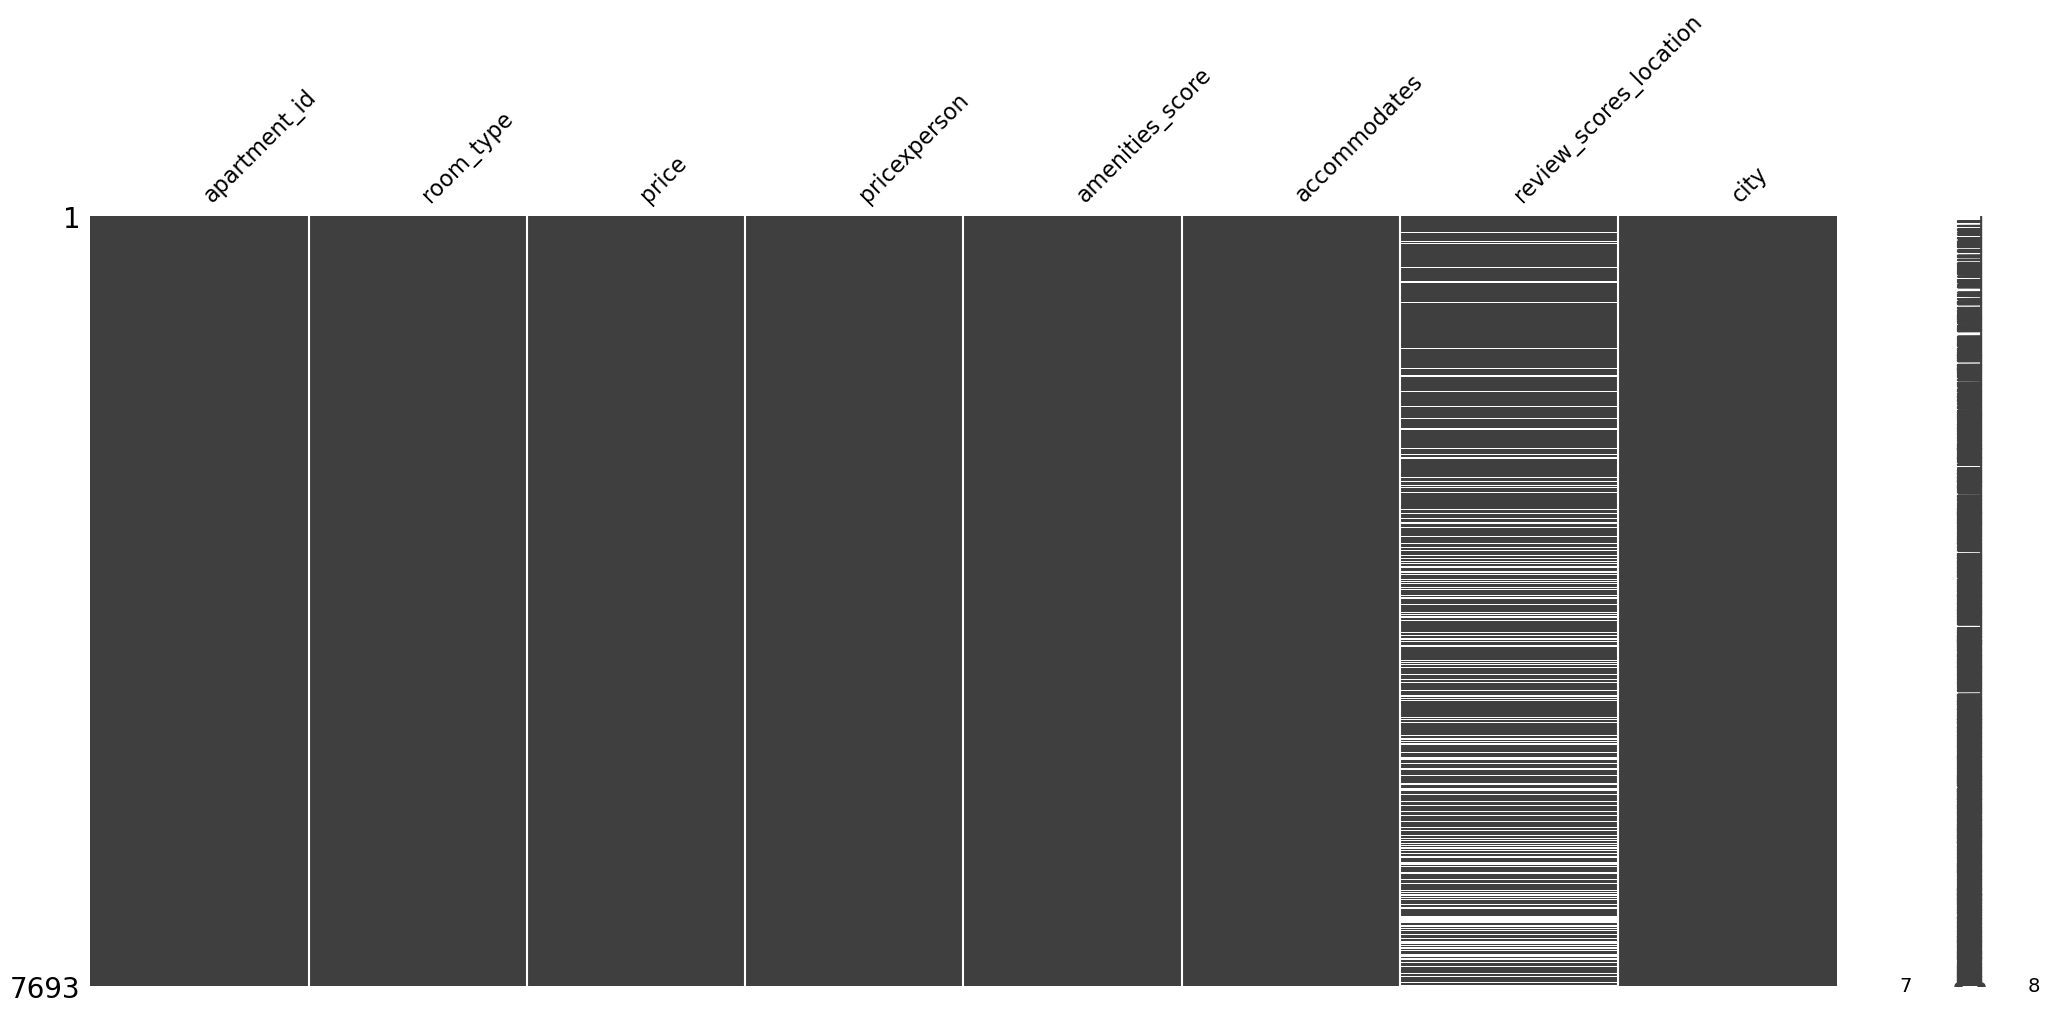

In [6]:
msno.matrix(df)
plt.show()

In [7]:
# Group by 'city' and calculate nulls
null_counts = df.groupby('city')['review_scores_location'].agg([
    ('null_count', lambda x: x.isnull().sum()),
    ('total_count', 'size')
])

# Calculate percentage of nulls
null_counts['percentage_nulls'] = (null_counts['null_count'] / null_counts['total_count']) * 100

# Reset index for better readability
result = null_counts.reset_index()

print(result)


        city  null_count  total_count  percentage_nulls
0  barcelona         434         2261         19.195046
1     girona         399         1198         33.305509
2     madrid         272         1645         16.534954
3     malaga          42          394         10.659898
4   mallorca         405         1265         32.015810
5    menorca          41          167         24.550898
6    sevilla          37          403          9.181141
7   valencia          26          360          7.222222


In [8]:
# Group by 'city' and calculate nulls
null_counts = df.groupby('accommodates')['review_scores_location'].agg([
    ('null_count', lambda x: x.isnull().sum()),
    ('total_count', 'size')
])

# Calculate percentage of nulls
null_counts['percentage_nulls'] = (null_counts['null_count'] / null_counts['total_count']) * 100

# Reset index for better readability
result = null_counts.reset_index()

print(result)


    accommodates  null_count  total_count  percentage_nulls
0              1         171          630         27.142857
1              2         322         1896         16.983122
2              3          92          492         18.699187
3              4         323         1763         18.321044
4              5         105          541         19.408503
5              6         307         1250         24.560000
6              7          45          168         26.785714
7              8         170          540         31.481481
8              9          26           82         31.707317
9             10          45          171         26.315789
10            11           4           18         22.222222
11            12          26           79         32.911392
12            13           1            6         16.666667
13            14           4            9         44.444444
14            15           1            4         25.000000
15            16          11           4

In [9]:
# Group by 'city' and calculate nulls
null_counts = df.groupby('room_type')['review_scores_location'].agg([
    ('null_count', lambda x: x.isnull().sum()),
    ('total_count', 'size')
])

# Calculate percentage of nulls
null_counts['percentage_nulls'] = (null_counts['null_count'] / null_counts['total_count']) * 100

# Reset index for better readability
result = null_counts.reset_index()

print(result)


         room_type  null_count  total_count  percentage_nulls
0  Entire Home Apt        1190         5453         21.822850
1       Hotel Room          11           53         20.754717
2     Private Room         443         2138         20.720299
3      Shared Room          12           49         24.489796


Null values in the column review_scores_locaition appear to be randomly distributed along the rows, not being conditioned by city, room type or number of accommodates.

### histogram for the numeric variables to correlate

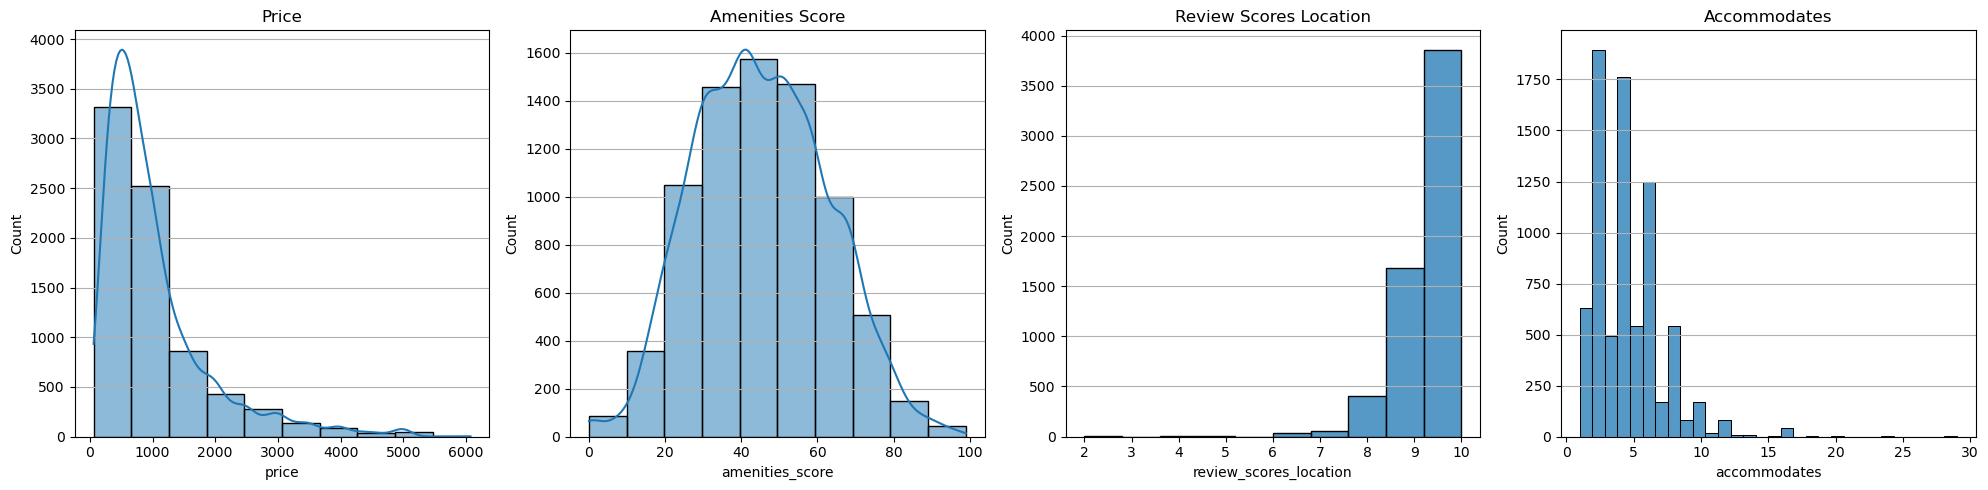

In [10]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Create histograms
sns.histplot(df['price'], ax=axes[0], kde=True, bins=10)
axes[0].set_title('Price')
axes[0].grid(axis='y')

sns.histplot(df['amenities_score'], ax=axes[1], kde=True, bins=10)
axes[1].set_title('Amenities Score')
axes[1].grid(axis='y')

sns.histplot(df['review_scores_location'], ax=axes[2], kde=False, bins=10)
axes[2].set_title('Review Scores Location')
axes[2].grid(axis='y')

sns.histplot(df['accommodates'], ax=axes[3], kde=False, bins=30)
axes[3].set_title('Accommodates')
axes[3].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

### matrix correlation of the numerical variables (NOT controlled by city)

In [11]:
df_numericas = df[['price', 'pricexperson', 'accommodates', 'amenities_score', 'review_scores_location']]

In [12]:
df_numericas.corr()

,price,pricexperson,accommodates,amenities_score,review_scores_location
price,1.000000,0.516752,0.606657,0.214132,0.006019
pricexperson,0.516752,1.000000,-0.134345,-0.019042,0.060582
accommodates,0.606657,-0.134345,1.000000,0.271292,-0.060757
amenities_score,0.214132,-0.019042,0.271292,1.000000,0.057803
review_scores_location,0.006019,0.060582,-0.060757,0.057803,1.000000


In [13]:
df = df_numericas

price                        0
pricexperson                 0
accommodates                 0
amenities_score              0
review_scores_location    1656
dtype: int64


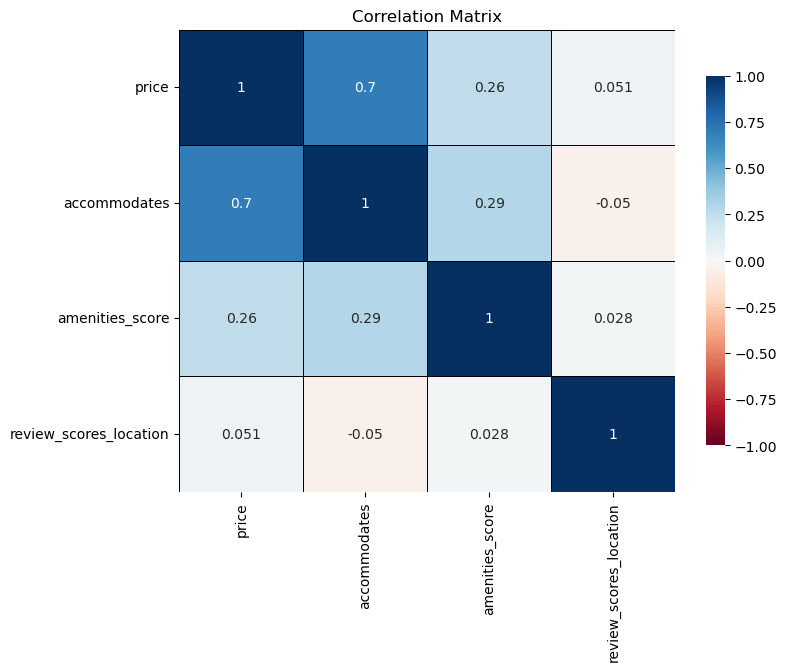

In [14]:
# Check for missing values
print(df.isnull().sum())

# Calculate the correlation matrix
correlation_matrix = df[['price', 'accommodates', 'amenities_score', 'review_scores_location']].corr(method='spearman')

# Print the correlation matrix
#print(correlation_matrix)

# Optional: Visualize the correlation matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', 
            center=0, vmin=-1, vmax=1,  # Set the color scale limits
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

### PRICE correlation with AMENITIES, ACCOMODATES and REVIEW FOR LOCATION

In [15]:
df = pd.read_pickle("./data/staySpain_transformed.pkl")

In [16]:
df = df[['price', 'pricexperson', 'amenities_score', 'accommodates', 'review_scores_location', 'city']]

In [17]:
# Function to calculate and store correlation matrix for each city
def store_correlation_matrices(df):
    for city, group in df.groupby('city'):
        corr_matrix = group[['price', 'amenities_score', 'accommodates', 'review_scores_location']].corr(method='spearman')
        globals()[f'corr_matrix_{city}'] = corr_matrix

# Store the correlation matrices
store_correlation_matrices(df)

# Create a new DataFrame with the first column of each correlation matrix
first_columns = {}
for city in df['city'].unique():
    first_columns[city] = globals()[f'corr_matrix_{city}'].iloc[:, 0]

# Combine into a new DataFrame
corr_price_each_city = pd.DataFrame(first_columns)

# Assuming corr_price_each_city is your DataFrame
corr_price_each_city = corr_price_each_city.sort_index(axis=1)

In [18]:
corr_price_each_city

,barcelona,girona,madrid,malaga,mallorca,menorca,sevilla,valencia
price,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
amenities_score,0.278220,0.171298,0.193084,0.181869,0.196954,0.194942,0.060579,0.070380
accommodates,0.699747,0.572879,0.676961,0.542187,0.602241,0.707636,0.520865,0.626753
review_scores_location,0.039029,0.057997,0.195068,0.150729,-0.000280,0.083743,0.185852,0.090546


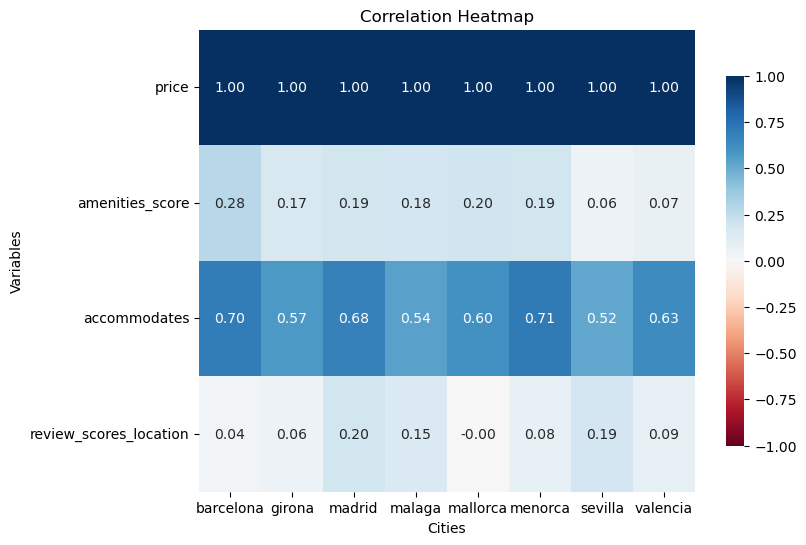

In [19]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_price_each_city, cmap='RdBu', center=0, annot=True, fmt=".2f", 
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)

# Set titles and labels
plt.title('Correlation Heatmap')
plt.xlabel('Cities')
plt.ylabel('Variables')

# Show the heatmap
plt.show()

In [20]:
corr_price_each_city.to_csv("Correlation of price vs others per city.csv")

### PRICE PER PERSON correlation with AMENITIES, ACCOMODATES and REVIEW FOR LOCATION

In [21]:
# Function to calculate and store correlation matrix for each city
def store_correlation_matrices(df):
    for city, group in df.groupby('city'):
        corr_matrix = group[['pricexperson', 'amenities_score', 'accommodates', 'review_scores_location']].corr()
        globals()[f'corr_matrix_{city}'] = corr_matrix

# Store the correlation matrices
store_correlation_matrices(df)

# Create a new DataFrame with the first column of each correlation matrix
first_columns = {}
for city in df['city'].unique():
    first_columns[city] = globals()[f'corr_matrix_{city}'].iloc[:, 0]

# Combine into a new DataFrame
corr_pricexperson_each_city = pd.DataFrame(first_columns)

In [22]:
corr_pricexperson_each_city

,malaga,madrid,sevilla,barcelona,girona,valencia,mallorca,menorca
pricexperson,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
amenities_score,-0.055646,-0.083449,-0.129314,0.017837,0.068089,-0.063520,0.005516,0.066583
accommodates,-0.269290,-0.178019,-0.175841,-0.128784,-0.107265,-0.173061,-0.233057,-0.075313
review_scores_location,0.055167,0.063230,0.065726,0.058253,0.072710,0.145879,0.100107,-0.054916


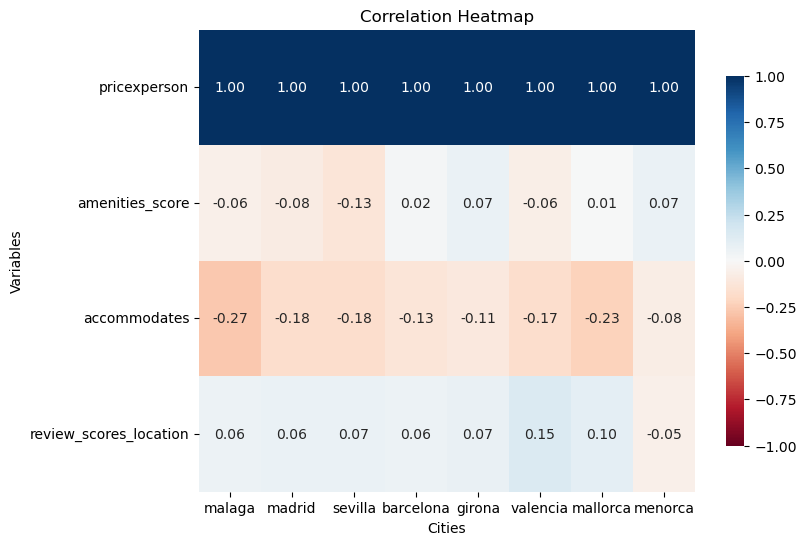

In [23]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pricexperson_each_city, cmap='RdBu', center=0, annot=True, fmt=".2f", 
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)

# Set titles and labels
plt.title('Correlation Heatmap')
plt.xlabel('Cities')
plt.ylabel('Variables')

# Show the heatmap
plt.show()